# Employee Exit Surveys Analysis

In this project we will take a look at Employee Exit Surveys and try to find patterns that can generate insights to understand better what took those employees to leave. By looking at categorical characteristics as well as crossing different pieces of information to generate and validate assumptions, our objective is mainly to clean the data and explore it.

### Guiding questions
> Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

> Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### Resources

We will utilize two different surveys, the first one from the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (**DETE**) of Queensland, Australia; and the second one from [Technical and Further Education Institute](https://en.wikipedia.org/wiki/Technical_and_further_education) (**TAFE**) also from Australia. The DETE Survey data was originally found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey), and TAFE Survey [here](https://data.gov.au/error?errorCode=404&recordType=Dataset&recordId=%22ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e%22), this second link however is not online anymore but the dataset was still provided by [DataQuest](https://dataquest.io/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv', encoding='UTF-8', na_values=['Not Stated'])
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='UTF-8', na_values=[])

# Initial data understanding
---

### DETE Survey

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
for col in dete_survey.columns:
    print(dete_survey[col].value_counts(dropna=False))
    print('\n')

1      1
553    1
543    1
544    1
545    1
      ..
277    1
278    1
279    1
280    1
823    1
Name: ID, Length: 822, dtype: int64


Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


2012       344
2013       200
01/2014     43
12/2013     40
NaN         34
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
08/2012      2
07/2014      2
04/2014      2
02/2014      2
04/2013      2
11/2012      1
07/2012      1
07/2006      1
2014         1
2010         1
09/2010      1
09/2014      1
Name: Cease Date, dtype: int64


NaN       73
2011.0   

### TAFE Survey

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [10]:
for col in tafe_survey.columns:
    print(tafe_survey[col].value_counts(dropna=False))
    print('\n')

6.344128e+17    1
6.346849e+17    1
6.349037e+17    1
6.343333e+17    1
6.347134e+17    1
               ..
6.345890e+17    1
6.342245e+17    1
6.343655e+17    1
6.348343e+17    1
6.343721e+17    1
Name: Record ID, Length: 702, dtype: int64


Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
The Bremer Institute of TAFE               1
Metropolitan South Institute of TAFE       1
Name: Institute, dtype: int64


Non-Delivery (corporate)    432
Delivery (teaching)         270
Name: WorkArea, dtype: int64


2011.0    268
2012.0    235
2010.0    103
2013.0     85
NaN         7
2009.0      4
Name: 

Name: WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job, dtype: int64


Agree                296
Strongly Agree       134
Neutral               99
NaN                   91
Disagree              45
Strongly Disagree     30
Not Applicable         7
Name: WorkUnitViews. Topic:23. My job provided sufficient variety, dtype: int64


Agree                298
Strongly Agree       148
NaN                   92
Neutral               91
Disagree              45
Strongly Disagree     22
Not Applicable         6
Name: WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job, dtype: int64


Agree                290
Strongly Agree       141
Neutral               93
NaN                   91
Disagree              53
Strongly Disagree     29
Not Applicable         5
Name: WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction, dtype: int64


Agree                231
Strongly Agree       1

### Observations

- A lot of columns need to be renamed
- A lot of columns are too specific questions which are not helpful for this exploration
- Both datasets have columns with the same information, but different names
- DETE Survey has 'Not Stated' insted of NaN values

# Data cleaning
---

### Dropping unecessary columns

Both DETE and TAFE survey have a pretty large number of columns, most of it not even displayed here when we pulled the first few rows. After understanding each column meaning, we came to the conclusion that some of them can be dropped out and it won't affect our analysis. So in order to *keep the data **clean** and consistent* so that later we can merge it, we will remove those columns.

In [11]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [12]:
print(dete_survey_updated.columns)
print('\n')
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

### Renaming the columns
To improve smooth both datasets and in the future be able to **merge** them, we will improve the columns naming and keep a standardized name equal for both.

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
new_col = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(new_col, axis=1, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filtering the data to only Resignations
Both datasets create a picture of 'Exits' overall, however not all Exits are resignations. As our analysis has a specific focus (illustrated on the guiding questions at the header of this notebook) we will now filter out all the data entries (rows) which are not related to what we are looking for: **Resignations of any kind**.

In [15]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [17]:
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [18]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'] == 'Resignation']
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Finding dates inconsistencies
The column **'cease_date'** represents the last year of a person's employment and **'dete_start_date'** is the person's first year of employment. For both these columns, it wouldn't make sense to find dates later than when the survey issue date. Let's find out.

In [19]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [20]:
dete_clean = dete_resignations.copy()

dete_clean['cease_date'] = dete_clean['cease_date'].str[-4:].astype(float)
dete_clean['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [21]:
dete_clean['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

<AxesSubplot:>

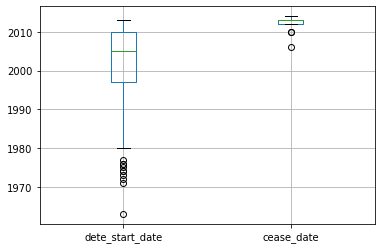

In [22]:
dete_clean.boxplot(column=['dete_start_date', 'cease_date'])

DETE Survey has the information of **start and end** date of each employment, whereas TAFE Survey has only **end and service time**. To ensure consistency when we merge both datasets, we will create the service time for DETE Survey using the start and end information.

In [23]:
dete_clean['institute_service'] = dete_clean['cease_date'] - dete_clean['dete_start_date']

dete_clean.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [24]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

<AxesSubplot:>

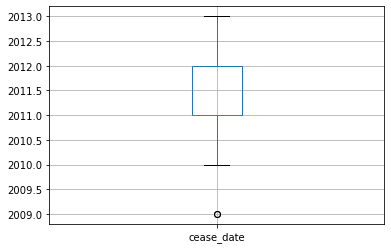

In [25]:
tafe_resignations.boxplot(column=['cease_date'])

No inconsistencies were found for TAFE Survey.

### Formatting ages
The column **'age'** presents different formats for each dataset. They both present itself in 5 year ranges and my first thought was to make an average of the min-max. However that would not preserve the data as it is, so the best thing to do is to ensure the ranges are as close as possible to each other, as well as **ensuring the ranges separators are the same**.

In [26]:
tafe_resignations['age'].value_counts()

41  45           45
46  50           39
51-55            39
21  25           33
26  30           32
36  40           32
31  35           32
56 or older      29
20 or younger     9
Name: age, dtype: int64

In [27]:
dete_clean['age'].value_counts()

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger     1
Name: age, dtype: int64

In [28]:
tafe_clean = tafe_resignations.copy()

tafe_clean['age'] = tafe_clean['age'].str.replace('  ', '-', regex=False)
tafe_clean['age'].value_counts()

41-45            45
51-55            39
46-50            39
21-25            33
26-30            32
31-35            32
36-40            32
56 or older      29
20 or younger     9
Name: age, dtype: int64

There is still one minor inconsistency between both datasets, that is:
- DETE Survey groups '61 or older'
- TAFE Survey groups '56 or older'

The best solution is to group DETE's '56-60' and '61 or older' categories into one named 56 or 'older'

In [29]:
dete_clean.loc[dete_clean['age'] == '56-60', 'age'] = '56 or older'
dete_clean.loc[dete_clean['age'] == '61 or older', 'age'] = '56 or older'
dete_clean['age'].value_counts()

56 or older      49
41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
31-35            29
21-25            29
20 or younger     1
Name: age, dtype: int64

### Formatting columns related to resignation due to dissatisfaction
As stated previously, these surveys report any type of exit, and even though we already filtered for resignations only, there are many reasons (which are listed) that someone can resign. Again, **coming back to our guiding questions** we are looking to find the employees who are not satisfied with their work for any reason.

The data that represents the resignation reason is spreaded around many columns, each one containing one reason. We will find the columns that interest us for each dataset, format them to contain **True or False values** and later we will keep only those.

#### Dissatisfaction in TAFE Survey

In [30]:
dissatisfied_col_tafe = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

for col in dissatisfied_col_tafe:
    print(tafe_clean[col].value_counts())
    print('\n')

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64




In [31]:
def update_vals(v):
    if pd.isnull(v):
        return np.nan
    elif v == '-':
        return False
    else:
        return True

In [32]:
tafe_clean[dissatisfied_col_tafe] = tafe_clean[dissatisfied_col_tafe].applymap(update_vals)
print(tafe_clean[dissatisfied_col_tafe[0]].value_counts())
print(tafe_clean[dissatisfied_col_tafe[1]].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [33]:
tafe_clean['dissatisfied'] = tafe_clean[dissatisfied_col_tafe].any(axis=1, skipna=False)
tafe_clean['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

#### Dissatisfaction in DETE Survey

In [34]:
dissatisfied_col_dete = ['job_dissatisfaction','dissatisfaction_with_the_department',
                     'physical_work_environment','lack_of_recognition','lack_of_job_security',
                     'work_location','employment_conditions','work_life_balance','workload']

for col in dissatisfied_col_dete:
    print(dete_clean[col].value_counts())
    print('\n')

False    270
True      41
Name: job_dissatisfaction, dtype: int64


False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


False    305
True       6
Name: physical_work_environment, dtype: int64


False    278
True      33
Name: lack_of_recognition, dtype: int64


False    297
True      14
Name: lack_of_job_security, dtype: int64


False    293
True      18
Name: work_location, dtype: int64


False    288
True      23
Name: employment_conditions, dtype: int64


False    243
True      68
Name: work_life_balance, dtype: int64


False    284
True      27
Name: workload, dtype: int64




In [35]:
dete_clean['dissatisfied'] = dete_clean[dissatisfied_col_dete].any(axis=1, skipna=False)
dete_clean['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

By aggregating all columns related to satisfaction into **True or False values** we could then create a new columns named **'dissatisfied'** in both datasets to which if each Employee had a True in any of the selected columns, it would also assign this new column as True.

In [36]:
dete_final = dete_clean.copy()
tafe_final = tafe_clean.copy()

# Combining DETE and TAFE datasets
---

In [37]:
dete_final['institute'] = 'DETE'
tafe_final['institute'] = 'TAFE'

In [38]:
combined = pd.concat([dete_final, tafe_final], ignore_index=True)

In [39]:
combined.dropna(axis=1, thresh=500, inplace=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


### Standardizing institute_service
An issue that went unnoticed during the Cleaning is that the **'institute_service'** column from both datasets was presenting different formatting. From DETE Survey we calculated manually so value outcome was a number however, from TAFE Survey it was stated as a range.

The best way to deal with this inconsistency now is to create categories and re-classify the values as follows:

| Category | Institute Service |
| :--- | :--- |
| New | Less than 3 years |
| Experienced | 3-6 years |
| Established | 7-10 years |
| Veteran | 11 or more years |


In [40]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
17.0                   6
10.0                   6
22.0                   6
12.0                   6
14.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
32.0                   3
19.0                   3
21.0                   3
39.0                   3
28.0                   2
25.0                   2
36.0                   2
26.0                   2
30.0                   2
27.0                   1


In [41]:
combined['institute_service'] = combined['institute_service'].astype(str)

combined['institute_service'] = combined['institute_service'].str.replace('Less than 1 year', '1').str.replace('More than 20 years', '20')
combined['institute_service'] = combined['institute_service'].str.extract(r'(\d+)')
combined['institute_service'] = combined['institute_service'].astype(float)
combined['institute_service'].value_counts(dropna=False).sort_index(ascending=True)

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service, dtype: int64

In [42]:
def career_stages(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif year < 7:
        return 'Experienced'
    elif year < 11:
        return 'Established'
    elif year >= 11:
        return 'Veteran'
    else:
        return 'MISTAKE'

In [43]:
combined['service_cat'] = combined['institute_service'].apply(career_stages)
combined['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

### Standardizing age
We are almost ready to answer the two guiding questions, the final step to standardize is to create categories for age, in which we should define a threshold between Young and Old. This is not an easy task, so the we will divide the dataset considering the **median**, this way ensuring we have a similar count of employees in both categories.

In [44]:
combined['age'].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
Name: age, dtype: int64

In [45]:
# Manually finding the median, as the values are strings
# Done through finding the middle index after dropping NaN
combined['age'].sort_values().dropna().iloc[293]

'41-45'

In [46]:
# Ranging +30 and -30 around the median to decide weather consider 41-45 as Young or Old
combined['age'].sort_values().dropna().iloc[293-30:293+30].value_counts()

41-45    50
36-40    10
Name: age, dtype: int64

As the median is closer to the '36-40' category, its reasonable to consider that the last one inside Young definition. Even though our solution was simply based on the median of the dataset, our final outcome makes sense as it is more or less the same threshold people can define as middle of their career:

| Category | Age|
| :--- | :--- |
| Young | Less than 41 years old |
| Old | Equal or more than 41 years old |


In [47]:
def age_category(age):
    if pd.isnull(age):
        return np.nan
    elif age == '20 or younger' or age == '21-25' or age == '26-30' or age == '31-35' or age == '36-40':
        return 'Young'
    else:
        return 'Old'

In [48]:
combined['age_cat'] = combined['age'].apply(age_category)
combined['age_cat'].value_counts(dropna=False)

Old      323
Young    273
NaN       55
Name: age_cat, dtype: int64

Now our dataset is clean enough for the analysis we want to do, and after a long process of standardization and formatting, we **one dataset** containing both DETE and TAFE Surveys.

# Employee Resignation Analysis
---

In [49]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [50]:
combined['dissatisfied'].fillna(value=False, inplace=True)

In [51]:
combined['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [52]:
service_pv = combined.pivot_table(values='dissatisfied', index='service_cat')
service_pv = service_pv.loc[['New', 'Experienced', 'Established', 'Veteran'], :]

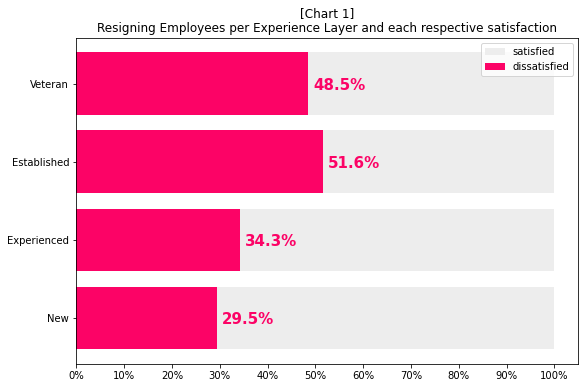

In [53]:
back_bar = service_pv.copy()
back_bar['dissatisfied'] = 1

fig, ax = plt.subplots(figsize=(9,6))
ax.barh(back_bar.index, back_bar['dissatisfied'], color='#ededed', label='satisfied')
ax.barh(service_pv.index, service_pv['dissatisfied'], color='#fc0366', label='dissatisfied')
plt.legend()
plt.xticks([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
           labels=['0%','10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylabel('')
plt.title('[Chart 1]\nResigning Employees per Experience Layer and each respective satisfaction')

for index, value in enumerate(service_pv['dissatisfied']):
    plt.text(value+0.01, index-0.07, (str(round(value * 100, 1))) + '%',
             weight='semibold',
             color='#fc0366',
             fontsize=15)

plt.show()

In [54]:
age_pv = combined.pivot_table(values='dissatisfied', index='age_cat')

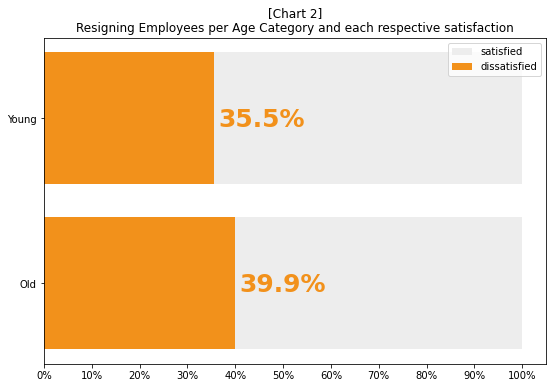

In [55]:
back_bar_2 = age_pv.copy()
back_bar_2['dissatisfied'] = 1

fig, ax = plt.subplots(figsize=(9,6))
ax.barh(back_bar_2.index, back_bar_2['dissatisfied'], color='#ededed', label='satisfied')
ax.barh(age_pv.index, age_pv['dissatisfied'], color='#f2911b', label='dissatisfied')
plt.legend()
plt.xticks([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
           labels=['0%','10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylabel('')
plt.title('[Chart 2]\nResigning Employees per Age Category and each respective satisfaction')

for index, value in enumerate(age_pv['dissatisfied']):
    plt.text(value+0.01, index-0.05, (str(round(value * 100, 1))) + '%',
             weight='semibold',
             color='#f2911b',
             fontsize=25)

plt.show()

In [56]:
age_range_pv = combined.pivot_table(values='dissatisfied', index='age')

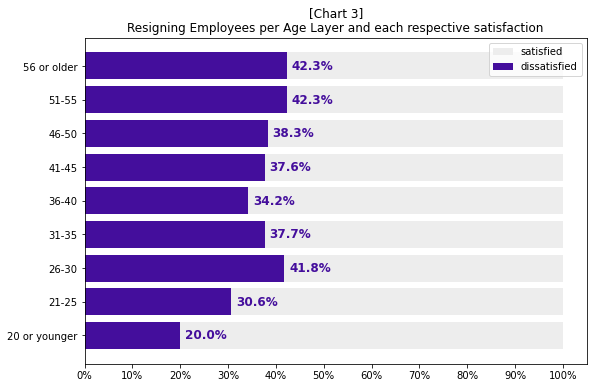

In [57]:
back_bar_3 = age_range_pv.copy()
back_bar_3['dissatisfied'] = 1

fig, ax = plt.subplots(figsize=(9,6))
ax.barh(back_bar_3.index, back_bar_3['dissatisfied'], color='#ededed', label='satisfied')
ax.barh(age_range_pv.index, age_range_pv['dissatisfied'], color='#440e9c', label='dissatisfied')
plt.legend()
plt.xticks([0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
           labels=['0%','10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.ylabel('')
plt.title('[Chart 3]\nResigning Employees per Age Layer and each respective satisfaction')

for index, value in enumerate(age_range_pv['dissatisfied']):
    plt.text(value+0.01, index-0.1, (str(round(value * 100, 1))) + '%',
             weight='semibold',
             color='#440e9c',
             fontsize=12)

plt.show()

In [58]:
print('[Table 1]')
print('Employees per Age Range')
combined['age'].value_counts().sort_index()

[Table 1]
Employees per Age Range


20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
Name: age, dtype: int64

# Findings and Conclusion
---

Coming back to our initial questions, here's what was found:

> Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- As seen in \[Chart 1\] Employees with a **higher experience level** tend to resign **more dissatisfied**
- As seen in \[Chart 1\] Employees with a **lower experience level** tend to resign **less dissatisfied**

---

> Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

For this question the answer was not as visual. Initially, as seen in \[Chart 2\] it was made a category splitting between Young and Old, however **no discernible information was found**. Yes, there was a slight difference between Young and Old, but **less than 5%** can't really be called a significant difference. With this, one assumption emerged *'There is no correlation between age and dissatisfaction when resigning'*. To validate this assumption we looked at the whole age breakdown, as seen in \[Chart 3\], and here are the findings:

- When comparing the \[Chart 3\] with the \[Table 1\] it's safe to assume that for '20 or younger' there are not enough of a sample size, and so the chart tendency downwards according to age should not be significant if considering this age range.

- That being said, from **26 to 56 or older** there is also no clear distinction in the ratio of dissatisfied resignations so it's hard to take any conclusion within this range that only varies up to ∓ 4%, with one exception:

- The range of **36-40** has the lowest percentage within the group mentioned on the topic above, and it can be considered meaningful if crossed with the fact that \[Table 1\] shows this range has a **large sample size of 73 Employees**. It could mean that this age range is less susceptible to resign due to dissatisfaction, but due to **other reasons**, as it's know this age range can be a breakthrough in many people's lives either starting a family, or changing careers, or even seeing their child leave for University... Many speculations can be made but certainly this shows a tendency.

- Lastly the range of **21-26** could be in some eyes the cut to split Young and Old. As explained earlier we did this cut by using the median, but others could argue that this range is good enough to define Young people. And yes, this range also shows a **lower rate of dissatisfied resignations**. It is still not a super significant finding as the percentages are still near, but it can be an indicator of a tendency that **very young people tend to leave their jobs for other reasons than dissatisfaction**.
